<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=75eb71332601edc0ee3c60e9f752cc5f54a89e35e13c876af575ea3cd07658ed
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [2]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [95]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [96]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [97]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [98]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [99]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 10 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 itens and each item itself list of 10 values 
    and S_actual, I_actual, R_actual are list of S, I, R respectively for (day +1) value for each of 10 days for each of 1000 rows   """

S_list = []
S_actual = []
I_list = []
I_actual = []
R_list = []
R_actual = []
for i in range(1000):
  p = sample(range(0, 99), 10)
  S_list.append(S_value[p].iloc[i].to_list())
  S_actual.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_actual.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_actual.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [100]:
""" merging 1000 lists each of 10 items into a single list of 10000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susactual_list = []
for i in range(1000):
 susactual_list = susactual_list+S_actual[i]

infectedactual_list = []
for i in range(1000):
 infectedactual_list = infectedactual_list+I_actual[i]  

recovactual_list = []
for i in range(1000):
 recovactual_list = recovactual_list+R_actual[i]


In [101]:
""" list to dataframe """

df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susactual_list)
df_5 = pd.DataFrame(infectedactual_list)
df_6 = pd.DataFrame(recovactual_list)

In [102]:
""" merging all dataframes into a single dataframe """

data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6], axis=1)
data.columns = range(data.shape[1])
#data[[1,4]] = data[[1,4]].apply(lambda x: x*10000)
data.head()

,0,1,2,3,4,5
0,203.865356,1.487134,794.647509,203.703531,1.251910,795.044558
1,207.684850,6.948656,785.366494,206.914894,5.861503,787.223603
2,202.847109,0.001771,797.151120,202.846917,0.001490,797.151593
3,205.266393,3.510526,791.223081,204.881829,2.957467,792.160704
4,974.513076,13.078503,12.408421,966.026509,17.191740,16.781751


In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
unscaled_data = scaler.inverse_transform(data_scaled)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()

,0,1,2,3,4,5
0,0.001280,0.009661,0.996856,0.001077,0.008133,0.997354
1,0.006078,0.045143,0.985213,0.005111,0.038080,0.987543
2,0.000002,0.000012,0.999996,0.000001,0.000010,0.999997
3,0.003040,0.022806,0.992560,0.002557,0.019213,0.993736
4,0.969243,0.084966,0.015566,0.958587,0.111688,0.021051


In [104]:
X = data_scaled[[0,1,2]]
y = data_scaled[[3,4,5]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
# load the dataset
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(3, activation='relu'))
# compile the keras model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)




Epoch 00001: val_accuracy improved from -inf to 0.98188, saving model to weights-improvement-01-0.98.hdf5


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '



Epoch 00002: val_accuracy improved from 0.98188 to 0.98563, saving model to weights-improvement-02-0.99.hdf5

Epoch 00003: val_accuracy improved from 0.98563 to 0.99000, saving model to weights-improvement-03-0.99.hdf5

Epoch 00004: val_accuracy did not improve from 0.99000

Epoch 00005: val_accuracy did not improve from 0.99000

Epoch 00006: val_accuracy did not improve from 0.99000

Epoch 00007: val_accuracy did not improve from 0.99000

Epoch 00008: val_accuracy did not improve from 0.99000

Epoch 00009: val_accuracy improved from 0.99000 to 0.99063, saving model to weights-improvement-09-0.99.hdf5

Epoch 00010: val_accuracy did not improve from 0.99063

Epoch 00011: val_accuracy did not improve from 0.99063

Epoch 00012: val_accuracy did not improve from 0.99063

Epoch 00013: val_accuracy did not improve from 0.99063

Epoch 00014: val_accuracy did not improve from 0.99063

Epoch 00015: val_accuracy did not improve from 0.99063

Epoch 00016: val_accuracy did not improve from 0.9906

In [106]:
predicted_y = model.predict(X_test)

In [107]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicted_y)

0.001590458957523696

In [108]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2000/2000 [==============================] - 0s 31us/step
Accuracy: 97.90


In [109]:
y_pred1 = model.predict(X_train)
y_pred2 = model.predict(X_test)
df_7 = pd.DataFrame(y_pred1)
df_8 = pd.DataFrame(y_pred2)

In [110]:
y_test.head()

,3,4,5
6252,9.783213e-01,6.202177e-02,0.010931
4684,1.653195e-06,1.252620e-05,0.999996
1731,3.334555e-13,6.620385e-13,1.000000
4742,1.341614e-03,1.012054e-02,0.996706
4521,3.658591e-01,9.997743e-01,0.441548


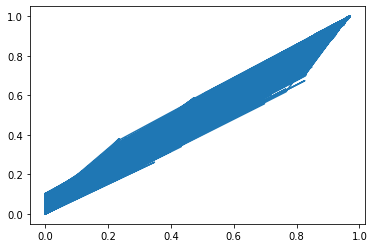

In [111]:
#plot of S_pred1 vs s_actual1                
#pred1 corresponds to prediction on training sets , where as actual1 corresponds actual value(y_train)
plt.figure(figsize=(6,4))
plt.plot(df_7[0],y_train[3])                                   

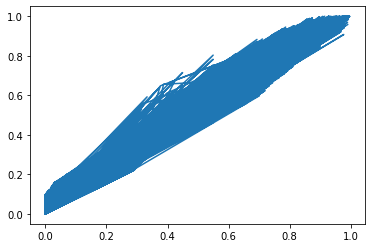

In [112]:
#plot of I_pred1 vs I_actual1
plt.figure(figsize=(6,4))
plt.plot(df_7[1],y_train[4])    

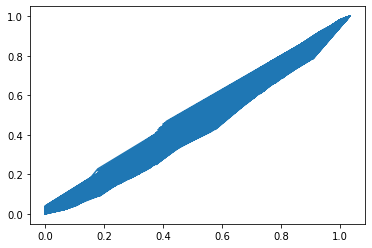

In [113]:
plt.figure(figsize=(6,4))
plt.plot(df_7[2],y_train[5])    #plot of R_pred1 vs R_actual1

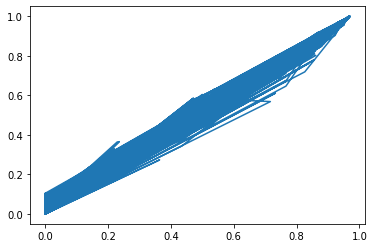

In [114]:
#plot of S_pred2 vs S_actual2
#pred2 corresponds to prediction on test sets , where as actual2 corresponds actual value(y_test)
plt.figure(figsize=(6,4))
plt.plot(df_8[0],y_test[3])    

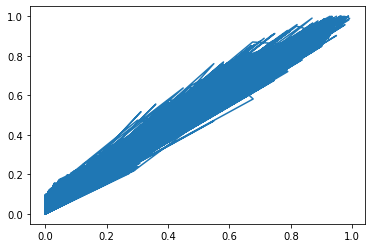

In [115]:
plt.figure(figsize=(6,4))
plt.plot(df_8[1],y_test[4])    #plot of I_pred2 vs I_actual2

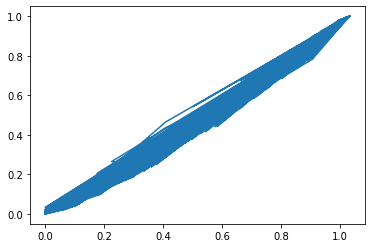

In [116]:
plt.figure(figsize=(6,4))
plt.plot(df_8[2],y_test[5])    #plot of R_pred2 vs R_actual2

In [117]:
comp_data = pd.DataFrame()   

In [118]:
k = 0
for i in range(100):
  comp_data[k] = S_value[i]
  comp_data[k+1] = I_value[i]
  comp_data[k+2] = R_value[i]
  k = k+3

In [119]:
#original data obtained from solving differential eqn
#columns are in S, I, R order for day  2,3, ......100.


comp_data = comp_data.iloc[:, 3:300] 
comp_data

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,998.326607,1.336246,0.337147,997.427702,1.784742,0.787556,996.228713,2.382329,1.388958,994.631156,3.177440,2.191404,992.505538,4.233369,3.261093,989.682604,5.632152,4.685245,985.942905,7.478929,6.578166,981.004975,9.906401,9.088624,974.513076,13.078503,12.408421,966.026509,17.191740,16.781751,955.014177,22.471526,22.514297,940.860251,29.159668,29.980081,922.889195,37.488005,39.622800,900.419717,...,797.139994,202.850715,7.053716e-03,797.142232,202.849951,5.934795e-03,797.144114,202.849308,4.993365e-03,797.145698,202.848768,4.201271e-03,797.147031,202.848313,3.534826e-03,797.148153,202.847930,2.974098e-03,797.149096,202.847608,2.502317e-03,797.149890,202.847337,2.105374e-03,797.150558,202.847109,1.771399e-03,797.151120,202.846917,1.490401e-03,797.151593,202.846756,1.253979e-03,797.151990,202.846620,1.055060e-03,797.152325,202.846506,8.876950e-04,797.152607
1,996.932575,2.031605,1.035819,992.754470,4.109827,3.135703,984.391739,8.242835,7.365426,967.970391,16.252969,15.776640,936.897416,31.012092,32.090492,881.982447,55.726242,62.291311,795.526422,90.598221,113.875358,680.765088,127.466169,191.768743,557.065574,150.898516,292.035910,448.111445,151.032145,400.856410,365.798080,131.865272,502.336648,309.091606,104.349856,586.558538,271.723248,77.291409,650.985343,247.502052,...,797.154100,202.845900,-3.182212e-10,797.154100,202.845900,-2.386531e-10,797.154100,202.845900,-2.212636e-10,797.154100,202.845900,-1.952257e-10,797.154100,202.845900,-1.691877e-10,797.154100,202.845900,-1.431498e-10,797.154100,202.845900,-1.171119e-10,797.154100,202.845900,-9.107391e-11,797.154100,202.845900,-6.503597e-11,797.154100,202.845900,-6.083164e-11,797.154100,202.845900,-5.997655e-11,797.154100,202.845900,-5.912146e-11,797.154100,202.845900,-5.826637e-11,797.154100
2,998.631772,1.183896,0.184332,998.196034,1.401419,0.402547,997.680523,1.658642,0.660835,997.070794,1.962704,0.966502,996.349852,2.321985,1.328163,995.497725,2.746305,1.755970,994.490978,3.247146,2.261876,993.302166,3.837902,2.859933,991.899211,4.534150,3.566639,990.244721,5.353942,4.401336,988.295239,6.318111,5.386650,986.000441,7.450571,6.548989,983.302304,8.778609,7.919087,980.134275,...,790.194840,205.416421,3.725811e+00,790.857768,205.170058,3.372147e+00,791.457795,204.947344,3.051812e+00,792.000845,204.746002,2.761708e+00,792.492290,204.563976,2.499020e+00,792.937004,204.399408,2.261186e+00,793.339406,204.250621,2.045878e+00,793.703502,204.116097,1.850983e+00,794.032920,203.994468,1.674581e+00,794.330951,203.884494,1.514932e+00,794.600574,203.785058,1.370454e+00,794.844488,203.695148,1.239716e+00,795.065136,203.613851,1.121417e+00,795.264732
3,998.710099,1.144784,0.145116,998.378343,1.310421,0.311237,997.998739,1.499878,0.501383,997.564454,1.716538,0.719008,997.067698,1.964247,0.968055,996.499602,2.247379,1.253019,995.850069,2.570898,1.579033,995.107622,2.940436,1.951942,994.259227,3.362366,2.378407,993.290100,3.843894,2.866006,992.183495,4.393148,3.423357,990.920479,5.019275,4.060245,989.479685,5.732543,4.787772,987.837051,...,759.071687,217.644395,2.040948e+01,761.946128,216.488445,1.890276e+01,764.608800,215.423469,1.750200e+01,767.074529,214.442219,1.620056e+01,769.357224,213.538033,1.499206e+01,771.469908,212.704791,1.387045e+01,773.424764,211.936866,1.282996e+01,775.233173,211.229086,1.186516e+01,776.905758,210.576694,1.097088e+01,778.452423,209.975317,1.014229e+01,779.882395,209.420931,9.374806e+00,781.204263,208.909835,8.664151e+00,782.426014,208.438623,8.006301e+00,783.555076
4,996.656217,2.169340,1.174443,991.604492,4.680284,3.715224,980.855679,9.979598,9.164723,958.597673,20.760667,20.641660,914.976760,41.095184,43.928056,837.916251,74.165439,87.918310,723.286900,115.238691,161.474409,588.366957,1

In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled_comp = scaler.fit_transform(comp_data)
unscaled_data_comp = scaler.inverse_transform(data_scaled_comp)
data_scaled_comp = pd.DataFrame(data_scaled_comp)
unscaled_data_comp = pd.DataFrame(unscaled_data_comp)
data_scaled_comp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296
0,0.803458,0.196814,0.196272,0.874966,0.125732,0.124345,0.923539,0.077800,0.075173,0.952935,0.049410,0.044946,0.968504,0.035675,0.028218,0.974959,0.033275,0.020119,0.975594,0.042314,0.017167,0.972290,0.058181,0.017326,0.965814,0.078917,0.019677,0.956205,0.105810,0.023976,0.943074,0.140330,0.030348,0.925786,0.184063,0.039128,0.903565,0.238521,0.050799,0.875596,...,0.999982,6.049699e-06,4.582539e-05,0.999985,5.090045e-06,3.858668e-05,0.999987,4.282619e-06,3.244288e-05,0.999989,3.603275e-06,2.729838e-05,0.999991,3.031693e-06,2.296630e-05,0.999993,2.550781e-06,1.934981e-05,0.999994,2.146156e-06,1.625963e-05,0.999995,1.805715e-06,1.368069e-05,0.999996,1.519278e-06,1.152519e-05,0.999996,1.278278e-06,9.683691e-06,0.999997,1.075507e-06,8.148848e-06,0.999997,9.049018e-07,6.855318e-06,0.999998,7.613588e-07,5.767912e-06,0.999998
1,0.395131,0.605280,0.604460,0.502201,0.499401,0.496220,0.596102,0.408501,0.399472,0.665088,0.346770,0.324195,0.698325,0.331684,0.278140,0.685064,0.393682,0.267864,0.619216,0.585868,0.297535,0.509466,0.826964,0.365939,0.382504,0.980198,0.463481,0.267808,0.981078,0.573102,0.180061,0.855728,0.677499,0.118949,0.675787,0.765888,0.078172,0.498826,0.834914,0.051363,...,1.000000,2.264300e-13,1.025481e-12,1.000000,3.082534e-13,1.543749e-12,1.000000,3.339551e-13,1.654923e-12,1.000000,3.668177e-13,1.814839e-12,1.000000,3.990142e-13,1.993944e-12,1.000000,4.311551e-13,2.166103e-12,1.000000,4.637402e-13,2.331517e-12,1.000000,4.987677e-13,2.501852e-12,1.000000,5.322409e-13,2.673911e-12,1.000000,5.450640e-13,2.697674e-12,1.000000,5.551670e-13,2.704055e-12,1.000000,5.647149e-13,2.708827e-12,1.000000,5.773715e-13,2.713966e-12,1.000000
2,0.892844,0.107321,0.106992,0.936253,0.064128,0.063371,0.963699,0.036964,0.035663,0.979275,0.021785,0.019768,0.987182,0.014547,0.011462,0.990612,0.012512,0.007521,0.991593,0.014640,0.005888,0.991246,0.018496,0.005439,0.990108,0.023041,0.005644,0.988395,0.028395,0.006276,0.986172,0.034692,0.007247,0.983435,0.042091,0.008533,0.980142,0.050768,0.010137,0.976227,...,0.991269,3.229563e-03,2.420522e-02,0.992100,2.920046e-03,2.192493e-02,0.992853,2.640240e-03,1.982822e-02,0.993535,2.387283e-03,1.794460e-02,0.994151,2.158594e-03,1.623651e-02,0.994709,1.951837e-03,1.471153e-02,0.995214,1.764906e-03,1.329377e-02,0.995671,1.595894e-03,1.202766e-02,0.996084,1.443082e-03,1.089527e-02,0.996458,1.304913e-03,9.843072e-03,0.996796,1.179984e-03,8.905747e-03,0.997102,1.067022e-03,8.055128e-03,0.997379,9.648810e-04,7.286546e-03,0.997629
3,0.915787,0.084346,0.084081,0.950795,0.049503,0.048910,0.972502,0.028005,0.027011,0.984605,0.016186,0.014681,0.990670,0.010592,0.008340,0.993309,0.008923,0.005358,0.994136,0.010218,0.004104,0.994030,0.012627,0.003707,0.993406,0.015378,0.003758,0.992443,0.018519,0.004080,0.991207,0.022103,0.004599,0.989719,0.026191,0.005283,0.987972,0.030847,0.006121,0.985951,...,0.952221,1.859260e-02,1.325928e-01,0.955827,1.714034e-02,1.229014e-01,0.959167,1.580237e-02,1.137139e-01,0.962261,1.456958e-02,1.052655e-01,0.965125,1.343361e-02,9.740566e-02,0.967775,1.238677e-02,9.024266e-02,0.970228,1.142198e-02,8.336690e-02,0.972497,1.053275e-02,7.709961e-02,0.974595,9.713112e-03,7.137949e-02,0.976536,8.957561e-03,6.589819e-02,0.978330,8.261046e-03,6.092115e-02,0.979988,7.618917e-03,5.629584e-02,0.981521,7.026895e-03,5.202194e-02,0.982938
4,0.314183,0.686188,0.685448,0.410472,0.591080,0.587999,0.498286,0.506505,0.497107,0.563894,0.449283,0.424197,0.591821,0.443141,0.380760,0.566452,0.526344,0.378078,0.484014,0.747003,0.421911,0.367033,0.954255,0.505120,0.252983,0.991283,0.607905,0.165075,0.867477,0.708445,0.105408,0.671965,0.793151,0.067003,0.480419,0.858009,0.042644,0.326139,0.904730,0.027195,...,1.000000,5.344614e-13,2.682535e-12,1.00

In [138]:
pred_data = {}
pred_data["group0"] = data_scaled_comp[[0,1,2]]

In [139]:
# Predicted data 
for i in range(98):
  pred_data["group" + str(i+1)] = pd.DataFrame(model.predict(pred_data["group" + str(i)]))

In [140]:
 predicted_data = pd.DataFrame()
 for i in range(98):
   predicted_data = pd.concat([predicted_data,pred_data["group" + str(i)]],axis = 1)

In [141]:
predicted_data

,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,...,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2
0,0.803458,0.196814,0.196272,0.832519,0.374873,0.133178,0.826021,0.449476,0.185831,0.766061,0.549366,0.178424,0.659975,0.727523,0.260235,0.505119,0.869370,0.356424,0.383358,0.958262,0.476150,0.209559,0.913429,0.612991,0.115113,0.683414,0.746130,0.021554,0.455562,0.878018,0.000000,0.248466,0.929992,0.000000,0.071155,0.978905,0.000000,0.000000,1.009969,0.0,...,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395
1,0.395131,0.605280,0.604460,0.132483,0.725719,0.721643,0.040351,0.501341,0.851519,0.000000,0.305447,0.914273,0.000000,0.117726,0.966058,0.000000,0.000000,0.997350,0.000000,0.000000,1.033826,0.000000,0.000000,1.036226,0.000000,0.000000,1.036383,0.000000,0.000000,1.036394,0.000000,0.000000,1.036394,0.000000,0.000000,1.036395,0.000000,0.000000,1.036395,0.0,...,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395
2,0.892844,0.107321,0.106992,0.900751,0.195353,0.078991,0.863470,0.293439,0.108598,0.838673,0.358683,0.128291,0.826021,0.449476,0.185831,0.766061,0.549366,0.178424,0.659975,0.727523,0.260235,0.505119,0.869370,0.356424,0.383358,0.958262,0.476150,0.209559,0.913429,0.612991,0.115113,0.683414,0.746130,0.021554,0.455562,0.878018,0.000000,0.248466,0.929992,0.0,...,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395
3,0.915787,0.084346,0.084081,0.917634,0.150932,0.065583,0.888862,0.226632,0.088432,0.853368,0.320020,0.116621,0.832786,0.374171,0.132966,0.826021,0.449476,0.185831,0.766061,0.549366,0.178424,0.659975,0.727523,0.260235,0.505119,0.869370,0.356424,0.383358,0.958262,0.476150,0.209559,0.913429,0.612991,0.115113,0.683414,0.746130,0.021554,0.455562,0.878018,0.0,...,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395
4,0.314183,0.686188,0.685448,0.090671,0.623890,0.780585,0.000000,0.388357,0.907619,0.000000,0.174274,0.950459,0.000000,0.021172,0.992191,0.000000,0.000000,1.026749,0.000000,0.000000,1.035760,0.000000,0.000000,1.036353,0.000000,0.000000,1.036392,0.000000,0.000000,1.036394,0.000000,0.000000,1.036394,0.000000,0.000000,1.036395,0.000000,0.000000,1.036395,0.0,...,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.745257,0.255070,0.254418,0.763289,0.587277,0.185478,0.649521,0.737099,0.266729,0.491981,0.881404,0.364585,0.372916,0.964064,0.489964,0.202475,0.896176,0.622977,0.108241,0.666680,0.755816,0.013409,0.435727,0.889499,0.000000,0.223788,0.936799,0.000000,0.050986,0.984469,0.000000,0.000000,1.016754,0.000000,0.000000,1.035103,0.000000,0.000000,1.036310,0.0,...,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.036395,0.0,0.0,1.

In [142]:
original_data = data_scaled_comp.iloc[:,3:297]

In [143]:
original_data   #we have to compare between original data and predicted data , which are data from day 3 to day 100 in S,I,R order

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296
0,0.874966,0.125732,0.124345,0.923539,0.077800,0.075173,0.952935,0.049410,0.044946,0.968504,0.035675,0.028218,0.974959,0.033275,0.020119,0.975594,0.042314,0.017167,0.972290,0.058181,0.017326,0.965814,0.078917,0.019677,0.956205,0.105810,0.023976,0.943074,0.140330,0.030348,0.925786,0.184063,0.039128,0.903565,0.238521,0.050799,0.875596,0.304864,0.065947,0.841159,...,0.999982,6.049699e-06,4.582539e-05,0.999985,5.090045e-06,3.858668e-05,0.999987,4.282619e-06,3.244288e-05,0.999989,3.603275e-06,2.729838e-05,0.999991,3.031693e-06,2.296630e-05,0.999993,2.550781e-06,1.934981e-05,0.999994,2.146156e-06,1.625963e-05,0.999995,1.805715e-06,1.368069e-05,0.999996,1.519278e-06,1.152519e-05,0.999996,1.278278e-06,9.683691e-06,0.999997,1.075507e-06,8.148848e-06,0.999997,9.049018e-07,6.855318e-06,0.999998,7.613588e-07,5.767912e-06,0.999998
1,0.502201,0.499401,0.496220,0.596102,0.408501,0.399472,0.665088,0.346770,0.324195,0.698325,0.331684,0.278140,0.685064,0.393682,0.267864,0.619216,0.585868,0.297535,0.509466,0.826964,0.365939,0.382504,0.980198,0.463481,0.267808,0.981078,0.573102,0.180061,0.855728,0.677499,0.118949,0.675787,0.765888,0.078172,0.498826,0.834914,0.051363,0.351928,0.885964,0.033783,...,1.000000,2.264300e-13,1.025481e-12,1.000000,3.082534e-13,1.543749e-12,1.000000,3.339551e-13,1.654923e-12,1.000000,3.668177e-13,1.814839e-12,1.000000,3.990142e-13,1.993944e-12,1.000000,4.311551e-13,2.166103e-12,1.000000,4.637402e-13,2.331517e-12,1.000000,4.987677e-13,2.501852e-12,1.000000,5.322409e-13,2.673911e-12,1.000000,5.450640e-13,2.697674e-12,1.000000,5.551670e-13,2.704055e-12,1.000000,5.647149e-13,2.708827e-12,1.000000,5.773715e-13,2.713966e-12,1.000000
2,0.936253,0.064128,0.063371,0.963699,0.036964,0.035663,0.979275,0.021785,0.019768,0.987182,0.014547,0.011462,0.990612,0.012512,0.007521,0.991593,0.014640,0.005888,0.991246,0.018496,0.005439,0.990108,0.023041,0.005644,0.988395,0.028395,0.006276,0.986172,0.034692,0.007247,0.983435,0.042091,0.008533,0.980142,0.050768,0.010137,0.976227,0.060927,0.012084,0.971605,...,0.991269,3.229563e-03,2.420522e-02,0.992100,2.920046e-03,2.192493e-02,0.992853,2.640240e-03,1.982822e-02,0.993535,2.387283e-03,1.794460e-02,0.994151,2.158594e-03,1.623651e-02,0.994709,1.951837e-03,1.471153e-02,0.995214,1.764906e-03,1.329377e-02,0.995671,1.595894e-03,1.202766e-02,0.996084,1.443082e-03,1.089527e-02,0.996458,1.304913e-03,9.843072e-03,0.996796,1.179984e-03,8.905747e-03,0.997102,1.067022e-03,8.055128e-03,0.997379,9.648810e-04,7.286546e-03,0.997629
3,0.950795,0.049503,0.048910,0.972502,0.028005,0.027011,0.984605,0.016186,0.014681,0.990670,0.010592,0.008340,0.993309,0.008923,0.005358,0.994136,0.010218,0.004104,0.994030,0.012627,0.003707,0.993406,0.015378,0.003758,0.992443,0.018519,0.004080,0.991207,0.022103,0.004599,0.989719,0.026191,0.005283,0.987972,0.030847,0.006121,0.985951,0.036149,0.007114,0.983628,...,0.952221,1.859260e-02,1.325928e-01,0.955827,1.714034e-02,1.229014e-01,0.959167,1.580237e-02,1.137139e-01,0.962261,1.456958e-02,1.052655e-01,0.965125,1.343361e-02,9.740566e-02,0.967775,1.238677e-02,9.024266e-02,0.970228,1.142198e-02,8.336690e-02,0.972497,1.053275e-02,7.709961e-02,0.974595,9.713112e-03,7.137949e-02,0.976536,8.957561e-03,6.589819e-02,0.978330,8.261046e-03,6.092115e-02,0.979988,7.618917e-03,5.629584e-02,0.981521,7.026895e-03,5.202194e-02,0.982938
4,0.410472,0.591080,0.587999,0.498286,0.506505,0.497107,0.563894,0.449283,0.424197,0.591821,0.443141,0.380760,0.566452,0.526344,0.378078,0.484014,0.747003,0.421911,0.367033,0.954255,0.505120,0.252983,0.991283,0.607905,0.165075,0.867477,0.708445,0.105408,0.671965,0.793151,0.067003,0.480419,0.858009,0.042644,0.326139,0.904730,0.027195,0.213879,0.937084,0.017363,...,1.000000,5.344614e-13,2.682535e-12,1

In [ ]:
#we have to compare between original data and predicted data , which are data from day 3 to day 100 in S,I,R order